# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: CS 457 - Homework Assignment 13: NLP



In [62]:
import numpy
import re
import requests
from bs4 import BeautifulSoup
import en_core_web_sm
from collections import Counter
from spacy import displacy
import spacy
from nltk import pos_tag, word_tokenize, RegexpParser
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ronit Kataria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Ronit
[nltk_data]     Kataria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3>Question -1</h3>
Select any article on the website of your interest and perform Name Entity Relation
(NER) analysis on it. Show all the necessary output and visualization and explain
your findings. Also mention if you see any shortcoming or error in the algorithm
output.

In [63]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))


In [64]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string(
    'https://blogs.lse.ac.uk/religionglobalsociety/2022/01/pakistans-dilemma-of-forced-conversions-and-marriages-put-minority-women-at-risk/')
article = nlp(ny_bb)
len(article.ents)


145

In [65]:
labels = [x.label_ for x in article.ents]
Counter(labels)


Counter({'GPE': 27,
         'ORG': 19,
         'PERSON': 24,
         'DATE': 35,
         'CARDINAL': 7,
         'TIME': 13,
         'NORP': 12,
         'ORDINAL': 4,
         'LAW': 1,
         'LOC': 1,
         'WORK_OF_ART': 1,
         'EVENT': 1})

In [66]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)


[('Pakistan', 21), ('Qamar Rafiq', 5), ('January 21, 2022', 5)]

In [67]:
sentences = [x for x in article.sents]
print(sentences[0])


 Pakistan's dilemma of forced conversions and marriages put minority women at risk | Religion and Global Society About Guidelines for Contributors Comments Policy Recent Posts Contact LSE Religion Scholars Network   About Guidelines for Contributors Podcasts and Videos Faith and Sport Empire Religion and Legacy Environment and Religion Covenantal Pluralism Religion in the US LSE Research Search Search for: Qamar Rafiq January 20th, 2022 Pakistan’s dilemma of forced conversions and marriages put minority women at risk 10 comments           | 63 shares        Estimated reading time: 4 minutes Qamar Rafiq January 20th, 2022 Pakistan’s dilemma of forced conversions and marriages put minority women at risk 10 comments           | 63 shares        Estimated reading time: 4 minutes       63       Shares In this post, Qamar Rafiq discusses religious minorities in Pakistan, seen more acutely through the ongoing issue of forced conversations and marriages.


In [68]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')


In [69]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])


{'Pakistan': 'GPE',
 'Religion and Global Society About Guidelines for Contributors Comments Policy Recent Posts Contact LSE Religion Scholars Network': 'ORG',
 'Videos Faith': 'ORG',
 'Sport Empire Religion': 'ORG',
 'US': 'GPE',
 'Qamar Rafiq': 'PERSON',
 'January 20th': 'DATE',
 '2022': 'DATE',
 '10': 'CARDINAL',
 '63': 'CARDINAL',
 '4 minutes': 'TIME'}

In [70]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Pakistan', 'PROPN', 'Pakistan'),
 ('dilemma', 'NOUN', 'dilemma'),
 ('forced', 'VERB', 'force'),
 ('conversions', 'NOUN', 'conversion'),
 ('marriages', 'NOUN', 'marriage'),
 ('minority', 'NOUN', 'minority'),
 ('women', 'NOUN', 'woman'),
 ('risk', 'NOUN', 'risk'),
 ('|', 'NOUN', '|'),
 ('Religion', 'PROPN', 'Religion'),
 ('Global', 'PROPN', 'Global'),
 ('Society', 'PROPN', 'Society'),
 ('Guidelines', 'PROPN', 'Guidelines'),
 ('Contributors', 'PROPN', 'Contributors'),
 ('Comments', 'PROPN', 'Comments'),
 ('Policy', 'PROPN', 'Policy'),
 ('Recent', 'PROPN', 'Recent'),
 ('Posts', 'PROPN', 'Posts'),
 ('Contact', 'PROPN', 'Contact'),
 ('LSE', 'PROPN', 'LSE'),
 ('Religion', 'PROPN', 'Religion'),
 ('Scholars', 'PROPN', 'Scholars'),
 ('Network', 'PROPN', 'Network'),
 ('  ', 'SPACE', '  '),
 ('Guidelines', 'PROPN', 'Guidelines'),
 ('Contributors', 'PROPN', 'Contributors'),
 ('Podcasts', 'PROPN', 'Podcasts'),
 ('Videos', 'PROPN', 'Videos'),
 ('Faith', 'PROPN', 'Faith'),
 ('

In [71]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')


<h3>Question-2</h3>
Select any research paper of your interest and perform word frequency and keyword
extraction analysis. Use at least 3 different techniques/libraries. Show all the
necessary output and visualization and explain your findings. Compare different
techniques and mention if you see any shortcoming or error in the algorithm output.

In [72]:
import tika
tika.initVM()
from tika import parser  # pip install tika

raw = parser.from_file("ludoPaper.pdf")
# print(raw['content'])


In [73]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et",
                 "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower()
                not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

filtered_word_freq = nltk.FreqDist(clean_words)


In [74]:
filtered_word_freq.most_common(20)


[('player', 101),
 ('players', 76),
 ('learning', 50),
 ('expert', 50),
 ('false', 40),
 ('Learning', 36),
 ('true', 34),
 ('TD', 31),
 ('performance', 28),
 ('random', 27),
 ('rate', 26),
 ('game', 25),
 ('episodes', 25),
 ('Ludo', 24),
 ('state', 24),
 ('wins', 23),
 ('function', 20),
 ('using', 19),
 ('RL', 19),
 ('value', 19)]

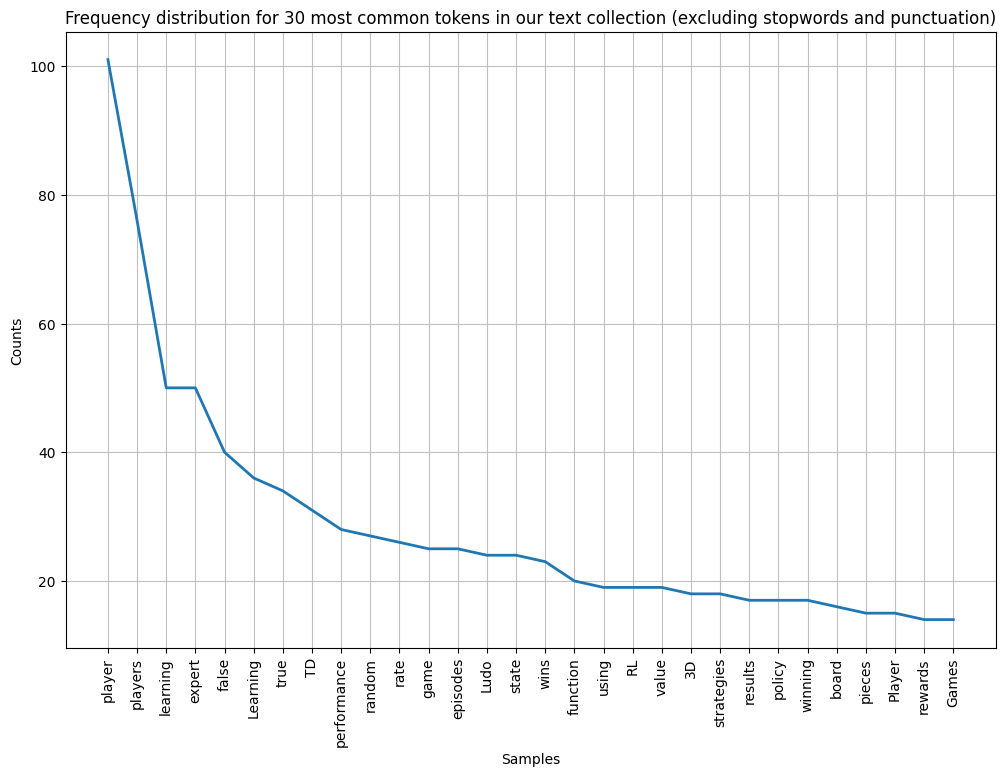

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [75]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]


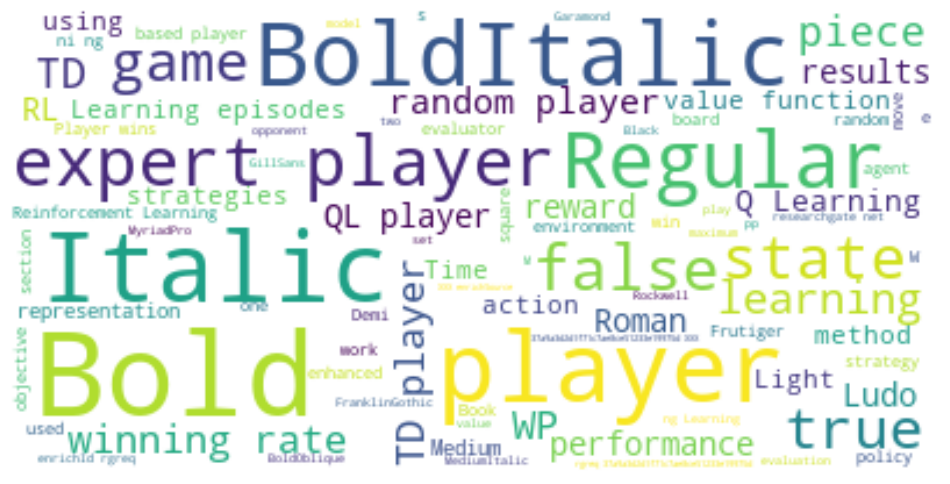

In [77]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


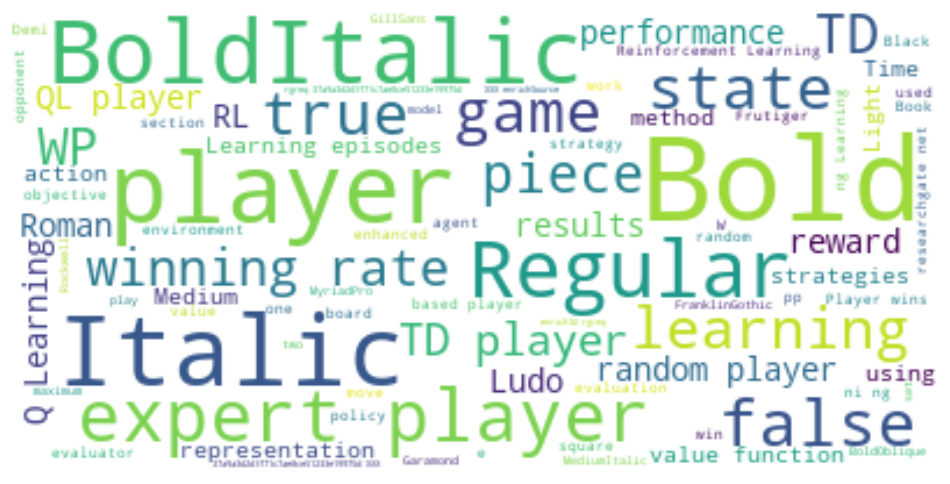

In [78]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [79]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]


[(257.92564102564097,
  '00 © 2012 ieee 83 ronit kataria highlight ronit kataria highlight ronit kataria highlight ronit kataria highlight create'),
 (113.5,
  'documenten te maken die zijn geoptimaliseerd voor weergave op een beeldscherm'),
 (112.45119047619048,
  'paraphrase identification view project faisal alvi habib university 9 publications 81 citations see profile'),
 (98.54850746268654,
  'moataz ahmed red player start area blue player start square blue player home square fig'),
 (73.6625, 'documenten kunnen worden geopend met acrobat en adobe reader 5'),
 (56.4234680117904,
  'learning based ludo players conference paper · september 2012 doi'),
 (49.599999999999994, '85 ronit kataria highlight'),
 (39.18787878787878, 'growing popularity across video games genres since'),
 (37.144348894348894,
  'low minimum performance reflects incorrect board evaluations caused'),
 (35.769230769230774, '2500 22500 42500 62500 82500 w')]

In [80]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)


(Ludo, September 2012, 10.1109, 5, 1,889, 3, Faisal Alvi, Habib University, 9, PUBLICATIONS, 81, CITATIONS, Faisal Alvi, 16 December 2020, https://www.researchgate.net/project/Paraphrase-Identification-3?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_9&_esc=publicationCoverPdf
https://www.researchgate.net/?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_1&_esc=publicationCoverPdf
https://www.researchgate.net/profile/Faisal-Alvi?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_4&_esc=publicationCoverPdf
https://www.researchgate.net/profile/Faisal-Alvi?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3

In [81]:
import yake

In [82]:
kw_extractor = yake.KeywordExtractor()
language = "en"

# This defines the length of topic. like if it 3 then there are 3 words in topic
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)


('expert player', 0.000800590849045306)
('player', 0.0008955857880815026)
('expert players Fig.', 0.0010457898246361273)
('random players', 0.0012096753225357437)
('players', 0.0012222111931465213)
('learning', 0.0012304417607970802)
('learning episodes', 0.001993127559586207)
('Reinforcement learning', 0.0020540723016325715)
('based Ludo players', 0.002108598267527307)
('Ludo player', 0.002500038866659421)
('expert Ludo player', 0.0028351052781063688)
('winning rate', 0.003282728382264114)
('expert', 0.0032993511053125207)
('Q-learning based Ludo', 0.00427686078412567)
('Ludo players Conference', 0.004438128775665974)
('expert player performance', 0.005035992564227709)
('Q-learning Ludo player', 0.005103259498807083)
('players Fig.', 0.005392854181281892)
('Ludo', 0.005471335399836933)
('proposed expert player', 0.005700094634321935)


<h3>Question 3<h3>

In [83]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob


In [84]:
# Part-1: Authorization and Search tweets
# Getting authorization
consumer_key = 'eR1zb853CsroHzovzLiJNPBK8'
consumer_key_secret = 'SMTGv6dLoAj81HAJ1q0I8DQ19pTTscdAINCXynLHdxb6tUDVjA'
access_token = '107436862-6ywCOzDd5bSHLZd3BWJ3buacPsL4OpWmhV5Lu9Uk'
access_token_secret = 'JAfDMXeg0OYz9ax8dELqvSlfX1sduHDVHnslVWwJjiJc2'
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [85]:
# Create a custom search term and define the number of tweets
search_term = " #ForcedConversions -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_term + 'since:2023-04-05',
                   lang="en").items(100)


In [86]:
searched_tweets = [t for t in tweets]


In [87]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_ForcedConversion.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_ForcedConversion.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_ForcedConversion_Data.csv',index=False)

In [88]:
def remove_url(txt):
    # Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [89]:
# Removing @ handle
import re


def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt


In [90]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])


In [91]:
tweet_dataset['text'] = np.vectorize(
    remove_pattern)(tweet_dataset['text'], "@[\w]*")


In [92]:
tweet_dataset.to_csv('tweet_data_clean_ForcedConversion.csv',index=False)

In [93]:
tweet_dataset = pd.read_csv('tweet_data_clean_ForcedConversion.csv')


In [94]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0] >= 0:
       res = 'positive'
    else:
       res = 'negative'
    return (res)


In [95]:
tweet_dataset['sentiment'] = np.vectorize(
    tweet_sentiment)(tweet_dataset['text'])


In [96]:
tweet_dataset.head(20)


,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1647956645425586177,RT NaziaMemon48 Put this man behind the bars i...,0,5,Mon Apr 17 13:34:16 +0000 2023,negative
1,1647938981881868288,RT HBhurgri My Hindu amp Christian brothers an...,0,22,Mon Apr 17 12:24:05 +0000 2023,positive
2,1647935113026760706,RT NaziaMemon48 Put this man behind the bars i...,0,5,Mon Apr 17 12:08:42 +0000 2023,negative
3,1647931368117268481,Speaking against Terrorism Hate speechSpeaking...,0,0,Mon Apr 17 11:53:49 +0000 2023,negative
4,1647902848653594624,RT NaziaMemon48 Put this man behind the bars i...,0,5,Mon Apr 17 10:00:30 +0000 2023,negative
5,1647896014324396032,RT NaziaMemon48 Put this man behind the bars i...,0,5,Mon Apr 17 09:33:20 +0000 2023,negative
6,1647894796906659840,RT HBhurgri Men cheering in support of love ma...,0,32,Mon Apr 17 09:28:30 +0000 2023,positive
7,1647887052707446785,RT HBhurgri Men cheering in support of love ma...,0,32,Mon Apr 17 08:57:44 +0000 2023,positive
8,1647879947938324481,RT NaziaMemon48 Put this man behind the bars i...,0,5,Mon Apr 17 08:29:30 +0000 2023,negative
9,1647863159959482370,RT MalaikaSRaza Bilawal seeks legislation to s...,0,20,Mon Apr 17 07:22:47 +0000 2023,negative


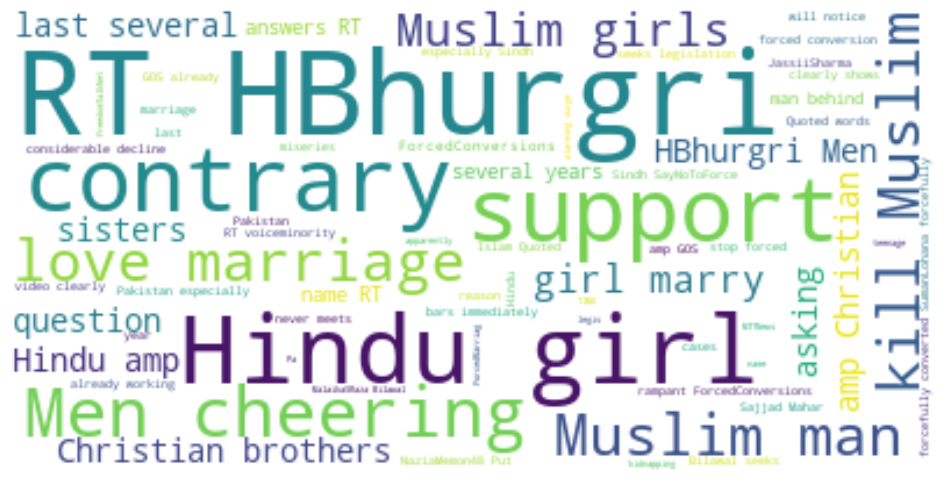

In [97]:
corpus = ' '.join(tweet_dataset.text)
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
